# An initial look at the data

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Going through the CRISP DM
## Stage 1 - Business Understanding
I am attempting to understand what factors are most highly correlated with high grades in math. Hopefully this information can be used to help students currently struggling to understand what changes they can make to improve.

Much of this dataset is already in a binary format which will help make it easy to compare the impact of many of these factors. I will look through the data and use statistical methods of measuring central tendency and variability to compare the effects of the relevant factors.

If I can find which factors are highly correlated with student success then I can publish the results on a blog post and share them.

## Stage 2 - Data Understanding
Here I will go through the dataset and get a feel for it. I will describe it and see its characteristics as a whole. Finally I will determine what if anything needs to be cleaned up.

In [9]:
#num of rows, cols, and type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [10]:
#no missing data - all columns fully filled in so no minimal cleaning necessary
len(df.columns[df.isnull().mean()==0])

33

In [11]:
cat_df = df.select_dtypes(include=['object'])
cat_df.info()
#can turn all of these into binary 1, 0 instead of yes, no
#except for mjob, fjob, reason, and guardian

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   address     395 non-null    object
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Mjob        395 non-null    object
 6   Fjob        395 non-null    object
 7   reason      395 non-null    object
 8   guardian    395 non-null    object
 9   schoolsup   395 non-null    object
 10  famsup      395 non-null    object
 11  paid        395 non-null    object
 12  activities  395 non-null    object
 13  nursery     395 non-null    object
 14  higher      395 non-null    object
 15  internet    395 non-null    object
 16  romantic    395 non-null    object
dtypes: object(17)
memory usage: 52.6+ KB


In [13]:
#categorical columns that are yes/no that need to be converted to binary 
col_lst = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'] 
conv_binary(df, col_lst)

### Lets look at some of the variables
Here I can see how the overall data set breaks down and also get an idea of what factors may have an affect on the final grades 

In [17]:
df['sex'].value_counts()/df.shape[0]
# here we see a 52.7% to 47.3% split in favor of females

0    0.526582
1    0.473418
Name: sex, dtype: float64

In [18]:
df['address'].value_counts()/df.shape[0]
# most of the students are in urban as opposed to rural environments

1    0.777215
0    0.222785
Name: address, dtype: float64

In [19]:
df['Pstatus'].value_counts()/df.shape[0]
# almost 90% of the kids have their parents living together not apart

1    0.896203
0    0.103797
Name: Pstatus, dtype: float64

In [20]:
df['famsize'].value_counts()/df.shape[0]
#71% are not only children

0    0.711392
1    0.288608
Name: famsize, dtype: float64

In [21]:
df['Medu'].value_counts()/df.shape[0]
#Mothers in Portugal are educated

4    0.331646
2    0.260759
3    0.250633
1    0.149367
0    0.007595
Name: Medu, dtype: float64

In [22]:
df['Fedu'].value_counts()/df.shape[0]
#Fathers lag a little behind mothers on the high end but pretty big disparity at the low end

2    0.291139
3    0.253165
4    0.243038
1    0.207595
0    0.005063
Name: Fedu, dtype: float64

In [23]:
df['studytime'].value_counts()/df.shape[0]
#Exactly what I'd expect - most people study a reasonable amount. More on the side of less than more

2    0.501266
1    0.265823
3    0.164557
4    0.068354
Name: studytime, dtype: float64

## Stage 3 - Data Preparation
This data set is almost perfect. It is entirely filled out so I don't need to deal with missing values and whether to drop or fill anything in. Very little of the day is categorical and even the categorical data is rated on a number scale (either binary or a range like 1-5). I just need to convert the categorical data to numerically binary so we can model and visualize it and this step is complete.

After the explatory look through the data I decided to focus on the factors that I initially thought would have an effect and see if my assumptions were correct, totally off, or somewhere in between

In [12]:
#create a function that will convert categorical data to numeric binary data
def conv_binary(df, col_name_list):
    ''' Converts from categorical data to numerical binary data
    Converts a list of column names from a dataframe that are categorical
    to numerically binary in place.
    Keyword arguments:
    df - the data frame containing the columns
    col_name_list - the list of column names that will be changed in place
    Returns nothing since the conversion is done in place on the data frame.
    '''
    for col in col_name_list:
        df[col].replace(to_replace=["yes", "no"], value=[1,0], inplace=True)

In [14]:
#now converting the other binary values that aren't yes/no to 1,0
#school, sex, address, famsize, and pstatus

df["school"].replace(to_replace=["GP", "MS"], value=[1,0], inplace=True)
df["sex"].replace(to_replace=["M", "F"], value=[1,0], inplace=True)
df["address"].replace(to_replace=["U", "R"], value=[1,0], inplace=True)
df["famsize"].replace(to_replace=["LE3", "GT3"], value=[1,0], inplace=True)
df["Pstatus"].replace(to_replace=["T", "A"], value=[1,0], inplace=True)

In [15]:
#check to make sure our substitution for binary strings worked
df[['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic','school','sex','address','famsize','Pstatus']]

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,school,sex,address,famsize,Pstatus
0,1,0,0,0,1,1,0,0,1,0,1,0,0
1,0,1,0,0,0,1,1,0,1,0,1,0,1
2,1,0,1,0,1,1,1,0,1,0,1,1,1
3,0,1,1,1,1,1,1,1,1,0,1,0,1
4,0,1,1,0,1,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,1,0,1,1,0,0,0,1,1,1,0
391,0,0,0,0,0,1,1,0,0,1,1,1,1
392,0,0,0,0,0,1,0,0,0,1,0,0,1
393,0,0,0,0,0,1,1,0,0,1,0,1,1


Data looks good! The cleaning up process was successful and we can see everything is now an integer which will make visualization simple and effective.

## Stage 4 - Modeling/Visualization
I will be looking at the data's measures of central tendency and seeing what it reveals about the final results. Visualization will also be used to help the reader understand the story the data is telling. The seaborn library is used for visualization because of their clear and simple to understand plots

### The work behind Question 3 - What  factors have the largest effect?
I think the heatmap does a great job of visualizing an entire data set and letting you really see the nuance and degree in it. I think this is a great way to wrap up the overall data analysis since its comprehensive for our data set

<AxesSubplot:>

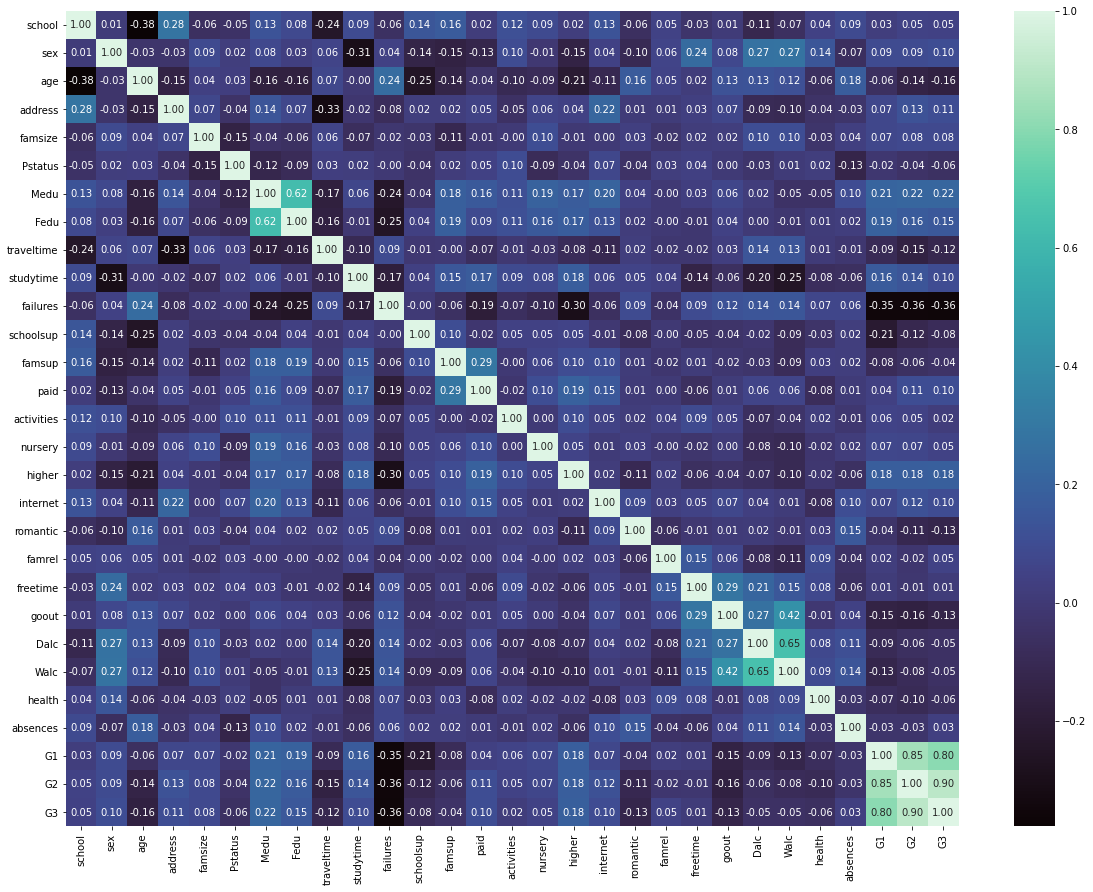

In [82]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), cmap='mako', annot=True, fmt="0.2f")

Text(0, 0.5, 'Number of Students')

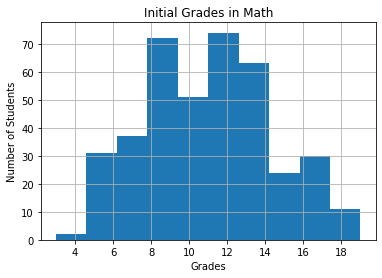

In [24]:
df['G1'].hist(bins=10)
plt.title('Initial Grades in Math')
plt.xlabel('Grades')
plt.ylabel('Number of Students')

Text(0, 0.5, 'Number of Students')

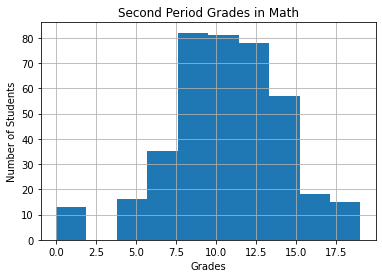

In [25]:
df['G2'].hist(bins=10)
plt.title('Second Period Grades in Math')
plt.xlabel('Grades')
plt.ylabel('Number of Students')

Text(0, 0.5, 'Number of Students')

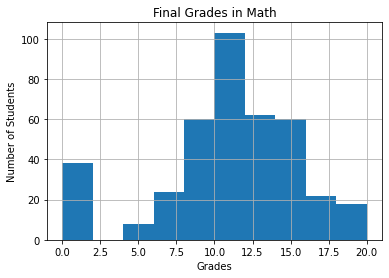

In [26]:
df['G3'].hist(bins=10)
plt.title('Final Grades in Math')
plt.xlabel('Grades')
plt.ylabel('Number of Students')

In [27]:
df['G1'].describe()

count    395.000000
mean      10.908861
std        3.319195
min        3.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64

In [28]:
df['G2'].describe()

count    395.000000
mean      10.713924
std        3.761505
min        0.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G2, dtype: float64

In [29]:
df['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

array([[<AxesSubplot:title={'center':'school'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'address'}>,
        <AxesSubplot:title={'center':'famsize'}>],
       [<AxesSubplot:title={'center':'Pstatus'}>,
        <AxesSubplot:title={'center':'Medu'}>,
        <AxesSubplot:title={'center':'Fedu'}>,
        <AxesSubplot:title={'center':'traveltime'}>,
        <AxesSubplot:title={'center':'studytime'}>],
       [<AxesSubplot:title={'center':'failures'}>,
        <AxesSubplot:title={'center':'schoolsup'}>,
        <AxesSubplot:title={'center':'famsup'}>,
        <AxesSubplot:title={'center':'paid'}>,
        <AxesSubplot:title={'center':'activities'}>],
       [<AxesSubplot:title={'center':'nursery'}>,
        <AxesSubplot:title={'center':'higher'}>,
        <AxesSubplot:title={'center':'internet'}>,
        <AxesSubplot:title={'center':'romantic'}>,
        <AxesSubplot:title={'center':'famrel'}>],
    

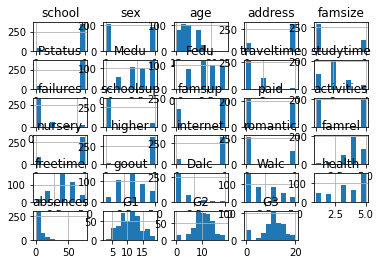

In [30]:
df.hist()

In [31]:
df.columns
#columns that are under students control
#studytime, failures, schoolsup, famsup, paid, activities, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences
#columns that are out of their control
#school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, traveltime, nursery

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [32]:
df_int = df[['studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']]
df_int.head()

,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,2,0,1,0,0,0,1,0,0,4,3,4,1,1,3,6
1,2,0,0,1,0,0,1,1,0,5,3,3,1,1,3,4
2,2,3,1,0,1,0,1,1,0,4,3,2,2,3,3,10
3,3,0,0,1,1,1,1,1,1,3,2,2,1,1,5,2
4,2,0,0,1,1,0,1,0,0,4,3,2,1,2,5,4


In [33]:
df_ext = df[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'traveltime', 'nursery']]
df_ext.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,nursery
0,1,0,18,1,0,0,4,4,at_home,teacher,2,1
1,1,0,17,1,0,1,1,1,at_home,other,1,0
2,1,0,15,1,1,1,1,1,at_home,other,1,1
3,1,0,15,1,0,1,4,2,health,services,1,1
4,1,0,16,1,0,1,3,3,other,other,1,1


### The data behind Question 1 - What environmental factors have an effect?

<AxesSubplot:title={'center':'Average Grades Based on Parents Cohabitation'}, xlabel='Pstatus', ylabel='G3'>

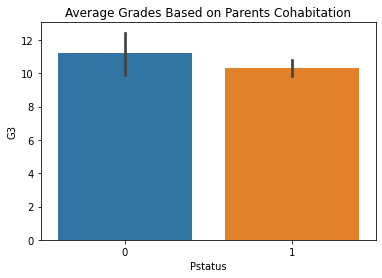

In [46]:
#['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'traveltime', 'nursery']]
plt.title('Average Grades Based on Parents Cohabitation')
plt.xlabel('Separated or Living Together')
plt.ylabel('Avg Grade')
sns.barplot(x='Pstatus', y='G3', data=df)

<AxesSubplot:xlabel='G3'>

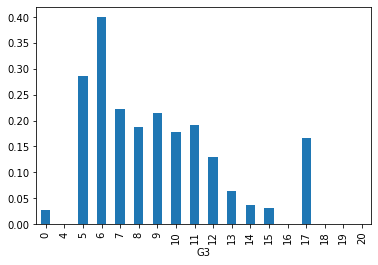

In [34]:
df.groupby('G3')['schoolsup'].mean().plot(kind='bar')

Text(0, 0.5, 'Final Grades')

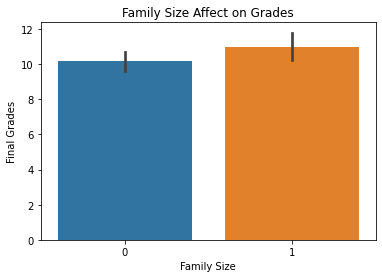

In [47]:
sns.barplot(x='famsize', y='G3', data=df)
plt.title('Family Size Affect on Grades')
plt.xlabel('Family Size')
plt.ylabel('Final Grades')

<AxesSubplot:xlabel='Medu', ylabel='G3'>

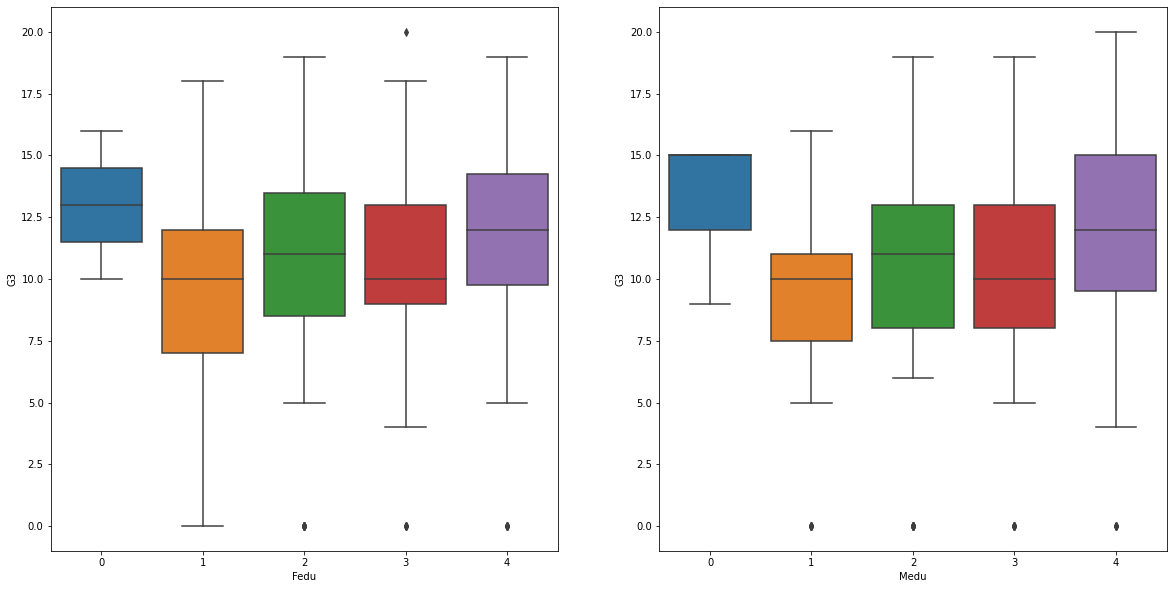

In [60]:
fix, ax = plt.subplots(1,2, figsize=(20,10))
plt.xlabel('Parents Highest Level of Education')
plt.ylabel('Final Grades')
sns.boxplot(x='Fedu', y='G3', data=df, orient='v', ax=ax[0])
sns.boxplot(x='Medu', y='G3', data=df, orient='v', ax=ax[1])

In [61]:
df['Fedu'].describe()

count    395.000000
mean       2.521519
std        1.088201
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

In [62]:
df['Medu'].describe()

count    395.000000
mean       2.749367
std        1.094735
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

### The data behind Question 2 - What controllable factors have an effect?

Text(0, 0.5, 'Final Grades')

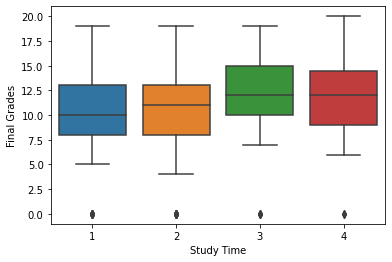

In [42]:
sns.boxplot(x='studytime', y='G3', data=df)
plt.xlabel('Study Time')
plt.ylabel('Final Grades')

Text(0.29999999999999716, 0.5, 'Final Grades')

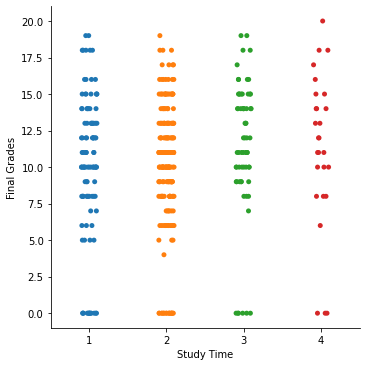

In [71]:
sns.catplot(x='studytime', y='G3', data=df)
plt.xlabel('Study Time')
plt.ylabel('Final Grades')

Text(0, 0.5, 'Final Grades')

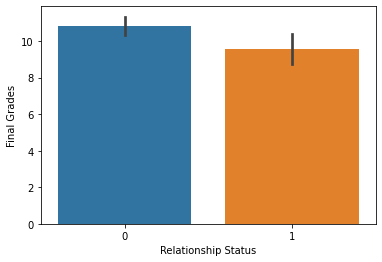

In [72]:
sns.barplot(x='romantic', y='G3', data=df)
plt.xlabel('Relationship Status')
plt.ylabel('Final Grades')

Text(0, 0.5, 'Final Grades')

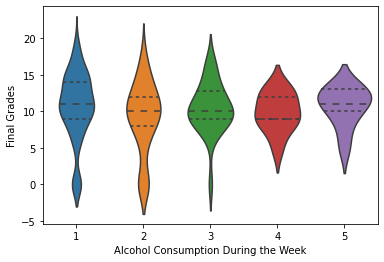

In [68]:
sns.violinplot(x='Dalc', y='G3', inner='quartile', data=df)
plt.xlabel('Alcohol Consumption During the Week')
plt.ylabel('Final Grades')

In [65]:
df['Dalc'].value_counts()

1    276
2     75
3     26
4      9
5      9
Name: Dalc, dtype: int64

In [ ]:
'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']]

Text(0, 0.5, 'Final Grades')

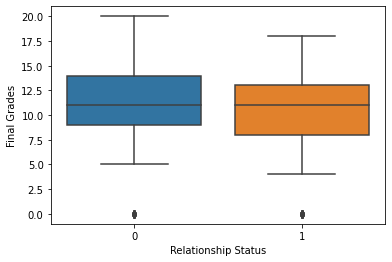

In [70]:
sns.boxplot(x='romantic', y='G3', data=df)
plt.xlabel('Relationship Status')
plt.ylabel('Final Grades')

## Stage 5 - Evaluation
Looking over the results from stage 4 I can see some trends and how they impact the students' final grades. I can see that some factors like study time are important as I initially thought. However weekday alcohol usage had a hindering effect but not nearly as pronounced as I would have that. This could also be due to small sample size since only 18 total students had high or very high alcohol usage. 

Surprisingly parents education had a huge effect with mother's education being even more impactful than father's education. Having aspirations of higher education is an excellent factor with predictive power however since very few students did not have higher education goals it could simply be an effect due to small sample size. It also has limited predictive power since it affects so few of the total sample size. However it is a clear indicator of lesser performance in those without it.

## Stage 6 - Deployment
Check out the full write up on Medium here: https://jselbaz.medium.com/were-you-a-good-math-student-f156acd890ee
It is written in laymen's terms so it should be easy to follow even for those with no interest in what happens behind the scene of data analysis.